In [30]:
#Importing the necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_process import arma_generate_sample, ArmaProcess

In [31]:
#Loading dataset which has imputed values using Random Forest
data = pd.read_csv('imputed_crimes.csv')
%matplotlib inline
data.head()

,Unnamed: 0,Dc_Dist,Psa,Dispatch_Date_Time,Dispatch_Date,Dispatch_Time,Hour,Dc_Key,Location_Block,UCR_General,Text_General_Code,Police_Districts,Month,Lon,Lat
0,0,18,3,2009-10-02 14:24:00,2009-10-02,14:24:00,14,200918067518,S 38TH ST / MARKETUT ST,800.0,Other Assaults,14.0,2009-10,NaN,NaN
1,1,14,1,2009-05-10 00:55:00,2009-05-10,00:55:00,0,200914033994,8500 BLOCK MITCH,2600.0,All Other Offenses,10.0,2009-05,NaN,NaN
2,2,25,J,2009-08-07 15:40:00,2009-08-07,15:40:00,15,200925083199,6TH CAMBRIA,800.0,Other Assaults,18.0,2009-08,NaN,NaN
3,7,77,A,2009-04-02 18:30:00,2009-04-02,18:30:00,18,200977001770,TERMINAL A W,500.0,Burglary Non-Residential,22.0,2009-04,NaN,NaN
4,8,35,D,2009-03-18 01:14:00,2009-03-18,01:14:00,1,200935021299,N 5TH SOMMERVILLE,2600.0,All Other Offenses,20.0,2009-03,NaN,NaN


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237605 entries, 0 to 2237604
Data columns (total 15 columns):
Unnamed: 0            int64
Dc_Dist               int64
Psa                   object
Dispatch_Date_Time    object
Dispatch_Date         object
Dispatch_Time         object
Hour                  int64
Dc_Key                int64
Location_Block        object
UCR_General           float64
Text_General_Code     object
Police_Districts      float64
Month                 object
Lon                   float64
Lat                   float64
dtypes: float64(4), int64(4), object(7)
memory usage: 256.1+ MB


In [33]:
data.isnull().sum()
#So now no any missing values for Police Districts.
#Latitude and Longitude cannot be predicted. And we are not using it.

Unnamed: 0                0
Dc_Dist                   0
Psa                       0
Dispatch_Date_Time        0
Dispatch_Date             0
Dispatch_Time             0
Hour                      0
Dc_Key                    0
Location_Block            0
UCR_General             663
Text_General_Code       663
Police_Districts          0
Month                     0
Lon                   17349
Lat                   17349
dtype: int64

In [34]:
#Converting to TIMESTAMP in proper format
data['Dispatch_Date_Time'] = pd.to_datetime(data['Dispatch_Date_Time'])
data.set_index('Dispatch_Date_Time', inplace=True)
data.sort_index(inplace=True)

In [35]:
#Making new columns
#Maintaining the Crime Coulmn so that I can you it for counting purpose
data['month'] = df.index.month
data['year'] = df.index.year
data['day'] = df.index.day
data['crimes'] = 1

In [36]:
data.head()

,Unnamed: 0,Dc_Dist,Psa,Dispatch_Date,Dispatch_Time,Hour,Dc_Key,Location_Block,UCR_General,Text_General_Code,Police_Districts,Month,Lon,Lat,month,year,day,crimes
Dispatch_Date_Time,,,,,,,,,,,,,,,,,,
2006-01-01 00:00:00,1038493,3,I,2006-01-01,00:00:00,0,200603000002,S 8TH ST /SOUTH ST,2600.0,All Other Offenses,3.0,2006-01,-75.155491,39.942416,1,2006,1,1
2006-01-01 00:02:00,1338793,19,R,2006-01-01,00:02:00,0,200619000047,5500 BLOCK CHERRY ST,800.0,Other Assaults,15.0,2006-01,-75.231975,39.963220,1,2006,1,1
2006-01-01 00:02:00,1389932,3,I,2006-01-01,00:02:00,0,200603000001,S 8TH ST /SOUTH ST,2600.0,All Other Offenses,3.0,2006-01,-75.155491,39.942416,1,2006,1,1
2006-01-01 00:04:00,1325562,18,Q,2006-01-01,00:04:00,0,200618000007,400 BLOCK S 55TH ST,1500.0,Weapon Violations,14.0,2006-01,-75.232374,39.953490,1,2006,1,1
2006-01-01 00:05:00,1395649,12,P,2006-01-01,00:05:00,0,200612000011,1700 BLOCK S 58TH ST,1500.0,Weapon Violations,9.0,2006-01,-75.230711,39.937644,1,2006,1,1


In [37]:
data.tail()

,Unnamed: 0,Dc_Dist,Psa,Dispatch_Date,Dispatch_Time,Hour,Dc_Key,Location_Block,UCR_General,Text_General_Code,Police_Districts,Month,Lon,Lat,month,year,day,crimes
Dispatch_Date_Time,,,,,,,,,,,,,,,,,,
2017-03-23 00:06:00,2185761,7,3,2017-03-23,00:06:00,0,201707007521,500 BLOCK AVON ST,800.0,Other Assaults,6.0,2017-03,-75.026776,40.113273,3,2017,23,1
2017-03-23 00:18:00,2188099,2,3,2017-03-23,00:18:00,0,201702015318,7600 E ROOSEVELT BLVD,1100.0,Fraud,2.0,2017-03,-75.051546,40.050521,3,2017,23,1
2017-03-23 00:26:00,2184415,39,1,2017-03-23,00:26:00,0,201739021055,5700 BLOCK MORRIS ST 101,800.0,Other Assaults,21.0,2017-03,-75.182257,40.029790,3,2017,23,1
2017-03-23 00:33:00,2196468,2,1,2017-03-23,00:33:00,0,201702015317,6400 BLOCK BUSTLETON AV,2600.0,All Other Offenses,2.0,2017-03,-75.070528,40.035690,3,2017,23,1
2017-03-23 01:29:00,2172835,24,3,2017-03-23,01:29:00,1,201724026395,3700 BLOCK RICHMOND ST,400.0,Aggravated Assault No Firearm,17.0,2017-03,-75.087735,39.990090,3,2017,23,1


In [38]:
#We don't have much data for 2017 We will predict the model till 2016
data = data[data.index < '2017-01-01']

In [39]:
data.head()

,Unnamed: 0,Dc_Dist,Psa,Dispatch_Date,Dispatch_Time,Hour,Dc_Key,Location_Block,UCR_General,Text_General_Code,Police_Districts,Month,Lon,Lat,month,year,day,crimes
Dispatch_Date_Time,,,,,,,,,,,,,,,,,,
2006-01-01 00:00:00,1038493,3,I,2006-01-01,00:00:00,0,200603000002,S 8TH ST /SOUTH ST,2600.0,All Other Offenses,3.0,2006-01,-75.155491,39.942416,1,2006,1,1
2006-01-01 00:02:00,1338793,19,R,2006-01-01,00:02:00,0,200619000047,5500 BLOCK CHERRY ST,800.0,Other Assaults,15.0,2006-01,-75.231975,39.963220,1,2006,1,1
2006-01-01 00:02:00,1389932,3,I,2006-01-01,00:02:00,0,200603000001,S 8TH ST /SOUTH ST,2600.0,All Other Offenses,3.0,2006-01,-75.155491,39.942416,1,2006,1,1
2006-01-01 00:04:00,1325562,18,Q,2006-01-01,00:04:00,0,200618000007,400 BLOCK S 55TH ST,1500.0,Weapon Violations,14.0,2006-01,-75.232374,39.953490,1,2006,1,1
2006-01-01 00:05:00,1395649,12,P,2006-01-01,00:05:00,0,200612000011,1700 BLOCK S 58TH ST,1500.0,Weapon Violations,9.0,2006-01,-75.230711,39.937644,1,2006,1,1


In [40]:
data.tail()

,Unnamed: 0,Dc_Dist,Psa,Dispatch_Date,Dispatch_Time,Hour,Dc_Key,Location_Block,UCR_General,Text_General_Code,Police_Districts,Month,Lon,Lat,month,year,day,crimes
Dispatch_Date_Time,,,,,,,,,,,,,,,,,,
2016-12-31 23:37:00,2138831,24,1,2016-12-31,23:37:00,23,201624125119,3200 BLOCK EMERALD ST,800.0,Other Assaults,17.0,2016-12,-75.108979,39.995515,12,2016,31,1
2016-12-31 23:43:00,2150159,14,4,2016-12-31,23:43:00,23,201714000029,8400 BLOCK MICHENER AV,900.0,Arson,10.0,2016-12,-75.174165,40.078948,12,2016,31,1
2016-12-31 23:44:00,2150080,6,3,2016-12-31,23:44:00,23,201606056819,1200 BLOCK CHANCELLOR ST,600.0,Thefts,5.0,2016-12,-75.161632,39.948579,12,2016,31,1
2016-12-31 23:46:00,2139544,2,3,2016-12-31,23:46:00,23,201702000001,7600 BLOCK CENTRAL AVE,800.0,Other Assaults,2.0,2016-12,-75.087071,40.068649,12,2016,31,1
2016-12-31 23:55:00,2141698,25,3,2016-12-31,23:55:00,23,201625110291,3500 BLOCK B ST,2100.0,DRIVING UNDER THE INFLUENCE,18.0,2016-12,-75.124460,40.002686,12,2016,31,1


In [42]:
#According to Police dept the crimes with UCR_General value more than 800 are less violent
non_violent_dataframe = data[data['UCR_General'] > 800]

In [43]:
non_violent_dataframe.count()

Unnamed: 0           1051463
Dc_Dist              1051463
Psa                  1051463
Dispatch_Date        1051463
Dispatch_Time        1051463
Hour                 1051463
Dc_Key               1051463
Location_Block       1051463
UCR_General          1051463
Text_General_Code    1051463
Police_Districts     1051463
Month                1051463
Lon                  1044739
Lat                  1044739
month                1051463
year                 1051463
day                  1051463
crimes               1051463
dtype: int64

Text(0.5,0,'Year of Crime')

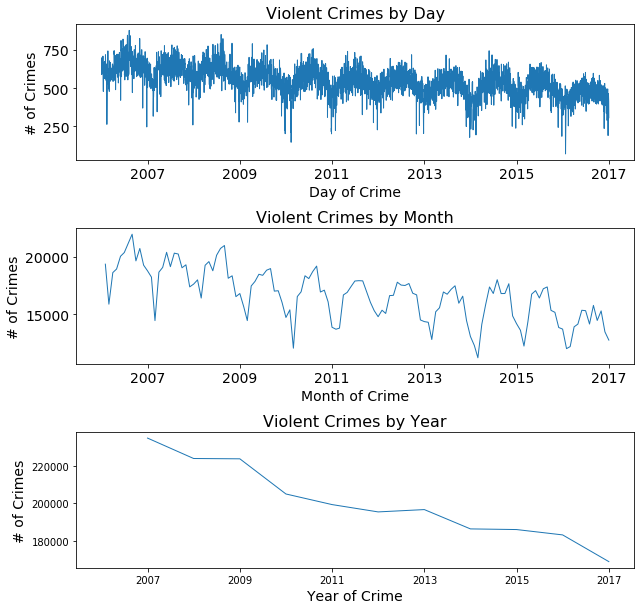

In [44]:
#Just an line graph to see the trend.
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=.5)
ax1 = fig.add_subplot(3,1,1)
ax1.plot(data['crimes'].resample('D').count(),linewidth=1)
ax1.set_title('Violent Crimes by Day', fontsize=16)
ax1.set_ylabel('# of Crimes', fontsize=14)
ax1.set_xlabel('Day of Crime', fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=14)

ax2 = fig.add_subplot(3,1,2, sharex=ax1)
ax2.plot(data['crimes'].resample('M').count(),linewidth=1)
ax2.set_title('Violent Crimes by Month', fontsize=16)
ax2.set_ylabel('# of Crimes', fontsize=14)
ax2.set_xlabel('Month of Crime', fontsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)

ax3  = fig.add_subplot(3,1,3, sharex=ax1)
ax3.plot(data['crimes'].resample('A').count(),linewidth=1)
ax3.set_title('Violent Crimes by Year', fontsize=16)
ax3.set_ylabel('# of Crimes', fontsize=14)
ax3.set_xlabel('Year of Crime', fontsize=14)

In [15]:
data.count()

Unnamed: 0           2228896
Dc_Dist              2228896
Psa                  2228896
Dispatch_Date        2228896
Dispatch_Time        2228896
Hour                 2228896
Dc_Key               2228896
Location_Block       2228896
UCR_General          2228328
Text_General_Code    2228328
Police_Districts     2228896
Month                2228896
Lon                  2211614
Lat                  2211614
month                2228896
year                 2228896
day                  2228896
crimes               2228896
dtype: int64

In [45]:
monthly_dataframe = data['crimes'].resample('M').count().to_frame()

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(monthly_dataframe)

In [18]:
#Finding trend.
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [19]:
seasonal.head()

,crimes
Dispatch_Date_Time,
2006-01-31,-1806.692330
2006-02-28,-3129.608996
2006-03-31,-280.221496
2006-04-30,408.820170
2006-05-31,1314.616004


In [47]:
monthly_dataframe['log_crimes'] = np.log(monthly_dataframe.crimes)
monthly_dataframe['seasonal'] = seasonal
monthly_dataframe['seasonal_decomp'] = monthly_dataframe['crimes'] - monthly_dataframe['seasonal']
monthly_dataframe['seasonal_decomp_diff'] = monthly_dataframe.seasonal_decomp.diff(1)
monthly_dataframe['monthly_diff'] = monthly_dataframe.crimes.diff(1)
monthly_dataframe['seasonal_diff'] = monthly_dataframe.crimes.diff(12)
monthly_dataframe['seasonal_monthly_diff'] = monthly_dataframe.monthly_diff - monthly_dataframe.monthly_diff.diff(12)

                               ARMA Model Results                               
Dep. Variable:     seasonal_decomp_diff   No. Observations:                  131
Model:                       ARMA(1, 0)   Log Likelihood               -1045.024
Method:                         css-mle   S.D. of innovations            704.665
Date:                  Mon, 09 Apr 2018   AIC                           2096.049
Time:                          23:54:07   BIC                           2104.674
Sample:                      02-28-2006   HQIC                          2099.554
                           - 12-31-2016                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        -47.7643     44.446     -1.075      0.285    -134.877      39.349
ar.L1.seasonal_decomp_diff    -0.3883      0.083     -4.690      0.

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


Text(0.5,0,'Year of Crime')

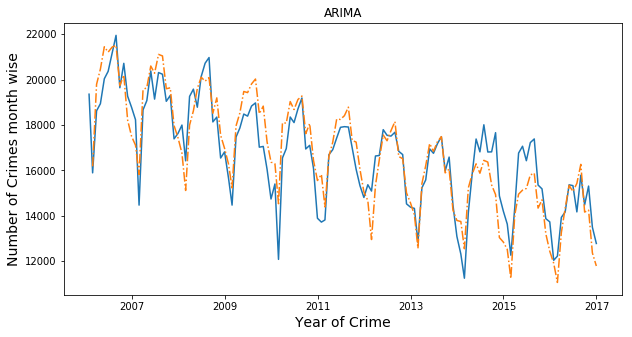

In [48]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(monthly_dataframe.seasonal_decomp_diff.dropna(),order=(1,0,0))
results = model.fit()

print (results.summary())
#Here the ARIMA is predicting the forecast month wise
monthly_dataframe['forecast'] = pd.Series(monthly_dataframe.crimes.ix[0], index = monthly_dataframe.index) \
                                .add(results.fittedvalues.cumsum()).add(monthly_dataframe.seasonal)
fig = plt.figure(figsize=(10,5))
plt.plot(monthly_dataframe.crimes, label = 'Actual')
plt.plot(monthly_dataframe.forecast,linestyle="-.", label='Fitted')
plt.title('ARIMA')
plt.ylabel('Number of Crimes month wise', fontsize=14)
plt.xlabel('Year of Crime', fontsize=14)

# Mean Absolute Percentage Error(MAPE)

In [22]:
violent_df['crimes'].resample('A').count()

Dispatch_Date_Time
2006-12-31    234755
2007-12-31    223902
2008-12-31    223735
2009-12-31    205044
2010-12-31    199415
2011-12-31    195521
2012-12-31    196755
2013-12-31    186489
2014-12-31    186146
2015-12-31    183300
2016-12-31    169101
2017-12-31     24733
Freq: A-DEC, Name: crimes, dtype: int64

In [49]:
print('MAPE: %f' % (100*np.mean(np.abs(monthly_violent_df.forecast-monthly_violent_df.crimes)/monthly_violent_df.crimes)))

MAPE: 5.432238


In [24]:
monthly_violent_df['forecast']

Dispatch_Date_Time
2006-01-31             NaN
2006-02-28    16186.290313
2006-03-31    19803.607360
2006-04-30    20477.865778
2006-05-31    21469.206672
2006-06-30    21238.785208
2006-07-31    21467.109146
2006-08-31    21553.756152
2006-09-30    19779.192656
2006-10-31    20257.859938
2006-11-30    18284.397628
2006-12-31    17574.458099
2007-01-31    17186.066265
2007-02-28    15903.541526
2007-03-31    19636.003408
2007-04-30    19745.743019
2007-05-31    20699.217490
2007-06-30    20388.812869
2007-07-31    21222.613173
2007-08-31    21163.590371
2007-09-30    19724.028795
2007-10-31    19771.868924
2007-11-30    18114.475324
2007-12-31    17583.821713
2008-01-31    16913.750063
2008-02-29    15277.676585
2008-03-31    18164.712629
2008-04-30    18798.399879
2008-05-31    19787.036028
2008-06-30    20289.600313
                  ...     
2014-09-30    16028.433730
2014-10-31    15612.989774
2014-11-30    13728.397638
2014-12-31    13535.064300
2015-01-31    13216.995822
2015-02-2